In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving first_500000_rows.csv to first_500000_rows.csv


In [4]:
df = pd.read_csv('/content/first_500000_rows.csv')

In [6]:
column_data = df['dealer_final_value']

print(column_data)


0         24
1         18
2         22
3         18
4         20
          ..
499995    17
499996    19
499997    18
499998    22
499999    20
Name: dealer_final_value, Length: 500000, dtype: object


In [7]:
# Remove any leading/trailing whitespace
column_data = column_data.str.strip()

# Replace any non-numeric characters with empty string
column_data = column_data.str.replace('[^0-9]', '', regex=True)

# Convert to numeric (will result in NaN for values that cannot be converted)
column_data = pd.to_numeric(column_data, errors='coerce')

# Optionally, you can fill NaN values with a specific value (e.g., 0)
# column_data = column_data.fillna(0)

print(column_data)


0         24.0
1         18.0
2         22.0
3         18.0
4         20.0
          ... 
499995    17.0
499996    19.0
499997    18.0
499998    22.0
499999    20.0
Name: dealer_final_value, Length: 500000, dtype: float64


In [8]:
column_data_2 = df['player_final_value']

print(column_data_2)

0         ['BJ']
1           [21]
2           [13]
3           [18]
4           [26]
           ...  
499995      [17]
499996      [14]
499997      [17]
499998      [12]
499999      [20]
Name: player_final_value, Length: 500000, dtype: object


In [9]:
column_data_2 = column_data_2.str.strip()

column_data_2 = column_data_2.str.replace('[^0-9]', '', regex=True)

column_data_2 = pd.to_numeric(column_data_2, errors='coerce')


print(column_data_2)

0          NaN
1         21.0
2         13.0
3         18.0
4         26.0
          ... 
499995    17.0
499996    14.0
499997    17.0
499998    12.0
499999    20.0
Name: player_final_value, Length: 500000, dtype: float64


In [10]:
# Explore column_data
print(column_data.describe())  # Summary statistics
print(column_data.isnull().sum())  # Count of missing values
print(column_data.value_counts())  # Frequency of unique values

# Explore column_data_2
print(column_data_2.describe())  # Summary statistics
print(column_data_2.isnull().sum())  # Count of missing values
print(column_data_2.value_counts())  # Frequency of unique values

count    476524.000000
mean         20.333702
std           2.580619
min          17.000000
25%          18.000000
50%          20.000000
75%          22.000000
max          26.000000
Name: dealer_final_value, dtype: float64
23476
dealer_final_value
20.0    90743
18.0    70539
19.0    68263
17.0    66475
21.0    37607
22.0    36761
23.0    32760
24.0    28748
25.0    24386
26.0    20242
Name: count, dtype: int64
count    4.761030e+05
mean     8.535148e+03
std      3.803095e+05
min      4.000000e+00
25%      1.600000e+01
50%      1.800000e+01
75%      2.000000e+01
max      2.625252e+07
Name: player_final_value, dtype: float64
23897
player_final_value
20.0        78186
17.0        54348
19.0        54072
18.0        51040
15.0        34856
            ...  
181320.0        1
171215.0        1
2415.0          1
192012.0        1
211916.0        1
Name: count, Length: 1151, dtype: int64


In [11]:
# Remove rows with missing values in both columns
df_cleaned = df.dropna(subset=['dealer_final_value', 'player_final_value'])

# Explore the cleaned data
print(column_data.describe())
print(column_data.isnull().sum())
print(column_data_2.describe())
print(column_data_2.isnull().sum())

count    476524.000000
mean         20.333702
std           2.580619
min          17.000000
25%          18.000000
50%          20.000000
75%          22.000000
max          26.000000
Name: dealer_final_value, dtype: float64
23476
count    4.761030e+05
mean     8.535148e+03
std      3.803095e+05
min      4.000000e+00
25%      1.600000e+01
50%      1.800000e+01
75%      2.000000e+01
max      2.625252e+07
Name: player_final_value, dtype: float64
23897


In [12]:
# Remove duplicate rows based on all columns
df_no_duplicates = df_cleaned.drop_duplicates()

# Explore the data after removing duplicates
print(df_no_duplicates.shape)  # Check the new shape


(500000, 12)


In [16]:
import numpy as np

# Calculate the IQR for both columns
Q1_dealer = column_data.quantile(0.25)
Q3_dealer = column_data.quantile(0.75)
IQR_dealer = Q3_dealer - Q1_dealer

Q1_player = column_data_2.quantile(0.25)
Q3_player = column_data_2.quantile(0.75)
IQR_player = Q3_player - Q1_player

# Define bounds for outliers
lower_bound_dealer = Q1_dealer - 1.5 * IQR_dealer
upper_bound_dealer = Q3_dealer + 1.5 * IQR_dealer

lower_bound_player = Q1_player - 1.5 * IQR_player
upper_bound_player = Q3_player + 1.5 * IQR_player

# Identify outliers
outliers_dealer = df_no_duplicates[(column_data > upper_bound_dealer) | (column_data < lower_bound_dealer)]
outliers_player = df_no_duplicates[(column_data_2 > upper_bound_player) | (column_data_2 < lower_bound_player)]

# Remove them:
df_no_outliers = df_no_duplicates[
    (column_data <= upper_bound_dealer) & (column_data >= lower_bound_dealer) &
    (column_data_2 <= upper_bound_player) & (column_data_2 >= lower_bound_player)]

# Explore the data after outlier handling
print(df_no_outliers.shape)


(441377, 12)


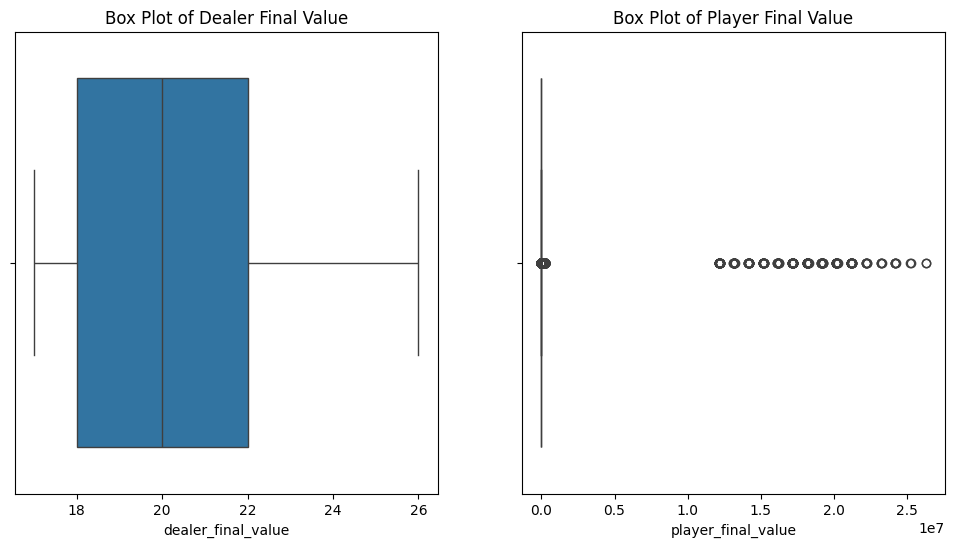

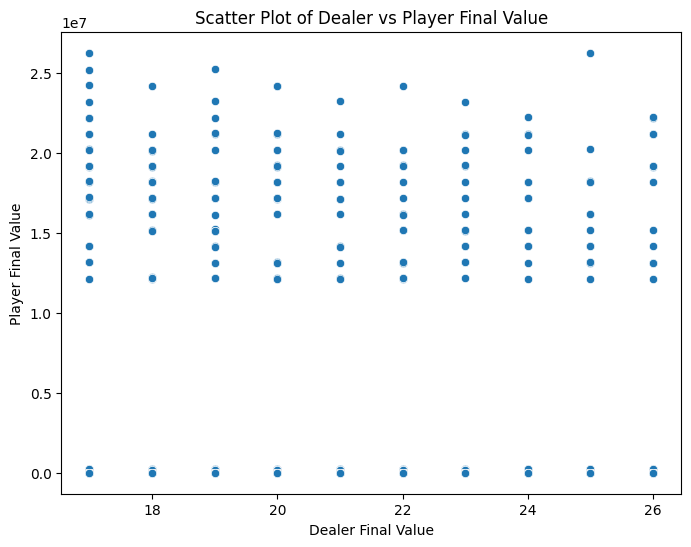

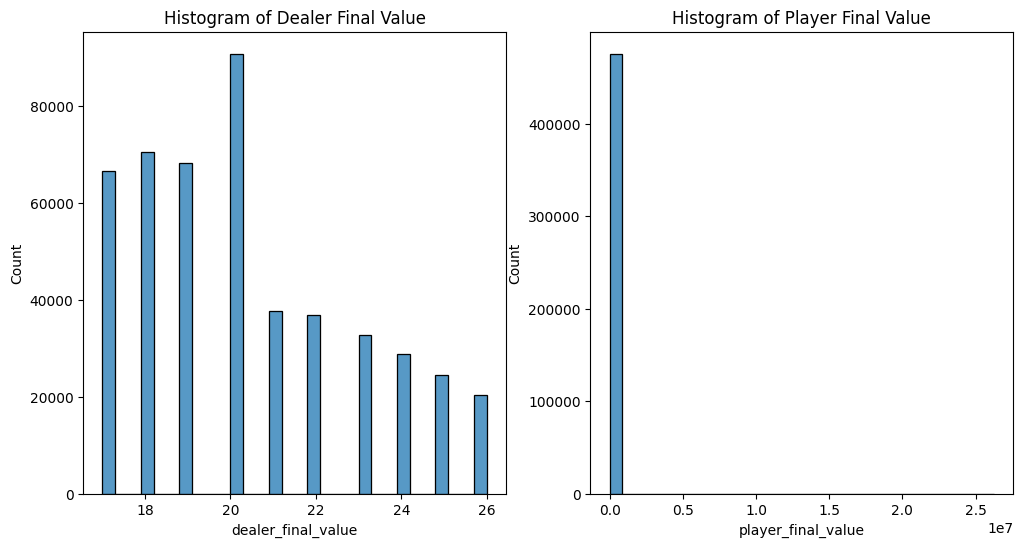

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots to visualize outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=column_data)
plt.title('Box Plot of Dealer Final Value')

plt.subplot(1, 2, 2)
sns.boxplot(x=column_data_2)
plt.title('Box Plot of Player Final Value')
plt.show()

# Scatter plot to see the relationship between the two columns and identify outliers visually
plt.figure(figsize=(8, 6))
sns.scatterplot(x=column_data, y=column_data_2)
plt.title('Scatter Plot of Dealer vs Player Final Value')
plt.xlabel('Dealer Final Value')
plt.ylabel('Player Final Value')
plt.show()

# Histogram for each column to see the distribution and potential outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(column_data, bins=30)
plt.title('Histogram of Dealer Final Value')

plt.subplot(1, 2, 2)
sns.histplot(column_data_2, bins=30)
plt.title('Histogram of Player Final Value')
plt.show()


In [18]:
# Iterate through columns and infer data types
for column in df_cleaned.columns:
  try:
    # Try converting to numeric
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='ignore')
  except:
    pass  # If not numeric, leave as is

# Print the data types of each column after conversion
print(df_cleaned.dtypes)


shoe_id                 int64
cards_remaining         int64
dealer_up               int64
initial_hand           object
dealer_final           object
dealer_final_value     object
player_final           object
player_final_value     object
actions_taken          object
run_count               int64
true_count              int64
win                   float64
dtype: object


In [19]:
new_column_names = {
    'dealer_final_value': 'Dealer_Final_Value',
    'player_final_value': 'Player_Final_Value'
}

df_cleaned = df_cleaned.rename(columns=new_column_names)

print(df_cleaned.columns)


Index(['shoe_id', 'cards_remaining', 'dealer_up', 'initial_hand',
       'dealer_final', 'Dealer_Final_Value', 'player_final',
       'Player_Final_Value', 'actions_taken', 'run_count', 'true_count',
       'win'],
      dtype='object')


In [20]:
df.to_csv('cleaned_data.csv', index=False)